In [39]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow

In [53]:
def histogram_equalizer(grey):
    
    image_array = np.asarray(grey)
    levels = [0]*256
    for i in range(0,len(image_array)):
        for j in range(0,len(image_array[0])):
            levels[image_array[i][j]]+=1

    width,height=grey.size
    size=width*height

    p = [0]*256
    for i in range(0,256):
        p[i] = levels[i]/float(size)

    cdf = [0]*256
    temp = 0
    for i in range(0,256):
        cdf[i] = temp + p[i]
        temp =cdf[i]

    after_hist = np.zeros(shape=(len(image_array),len(image_array[0])))

    tcdf = [0]*256
    for i in range(0,256):
        tcdf[i] = round(i * cdf[i])

    for i in range(0,len(image_array)):
        for j in range(0,len(image_array[0])):
            after_hist[i][j] = tcdf[image_array[i][j]]

    eqlsd = Image.fromarray(after_hist)
    return eqlsd

### Original Image

In [43]:
image = Image.open('image.png')
grey = image.convert('L')


## Tiling - Spliting the Image into 4 tiles

In [44]:
img_arr = np.asarray(grey)
img_arr.shape


(738, 768)

In [45]:
tile1 = img_arr[0:369,0:384]
tile2 = img_arr[369:-1,0:384]
tile3 = img_arr[0:369,384:-1]
tile4 = img_arr[369:-1,384:-1]

cv2.imwrite("tile1.png", tile1)
cv2.imwrite("tile2.png", tile2)
cv2.imwrite("tile3.png", tile3)
cv2.imwrite("tile4.png", tile4)

True

## Tile 1

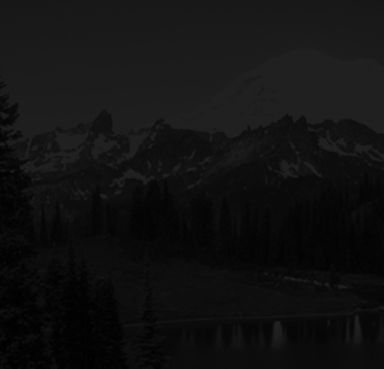

In [48]:
tile1_img = Image.open('tile1.png')
tile1_img

## Tile 2

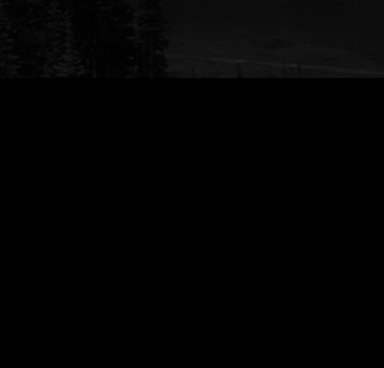

In [49]:
tile2_img = Image.open('tile2.png')
tile2_img

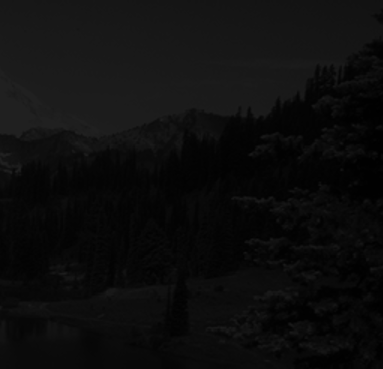

In [50]:
tile3_img = Image.open('tile3.png')
tile3_img

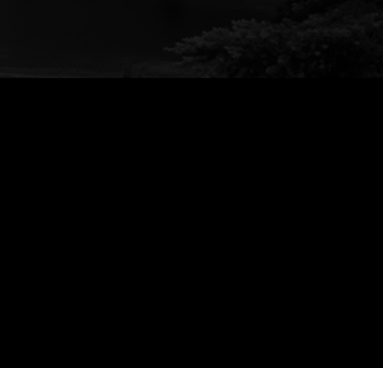

In [52]:
tile4_img = Image.open('tile4.png')
tile4_img

### Applying Histogram Equalization onto Tiles

In [84]:
image_array = np.asarray(tile1)
levels = [0]*256
for i in range(0,len(image_array)):
    for j in range(0,len(image_array[0])):
        levels[image_array[i][j]]+=1
        
width,height=grey.size
size=width*height

p = [0]*256
for i in range(0,256):
    p[i] = levels[i]/float(size)

cdf = [0]*256
temp = 0
for i in range(0,256):
    cdf[i] = temp + p[i]
    temp =cdf[i]

after_hist = np.zeros(shape=(len(image_array),len(image_array[0])))

tcdf = [0]*256
for i in range(0,256):
    tcdf[i] = round(i * cdf[i])

for i in range(0,len(image_array)):
    for j in range(0,len(image_array[0])):
        after_hist[i][j] = tcdf[image_array[i][j]]

eqlsd = Image.fromarray(after_hist)


In [85]:
#after_hist = cv2.equalizeHist(tile1)

In [86]:
cv2.imwrite("hist_tile1.png", after_hist)

True

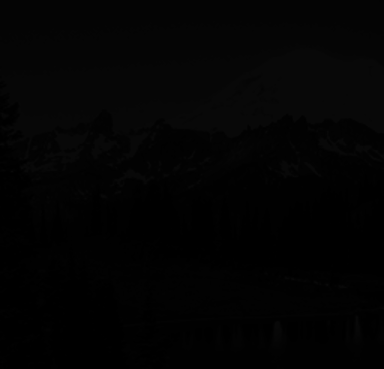

In [88]:
after_hist =  Image.open('hist_tile1.png')
after_hist